<a href="https://colab.research.google.com/github/abdelilah-abdel/machine_learning_learnings/blob/main/machinelearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import tree

In [4]:
df = pd.read_csv('kyphosis.csv')

In [5]:
#dimensions :
print(df.shape)

(81, 4)


In [8]:
df.tail(10)

,Kyphosis,Age,Number,Start
71,absent,127,4,12
72,absent,87,4,16
73,absent,206,4,10
74,absent,11,3,15
75,absent,178,4,15
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6
80,absent,36,4,13


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [10]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


Text(0, 0.5, 'frequence')

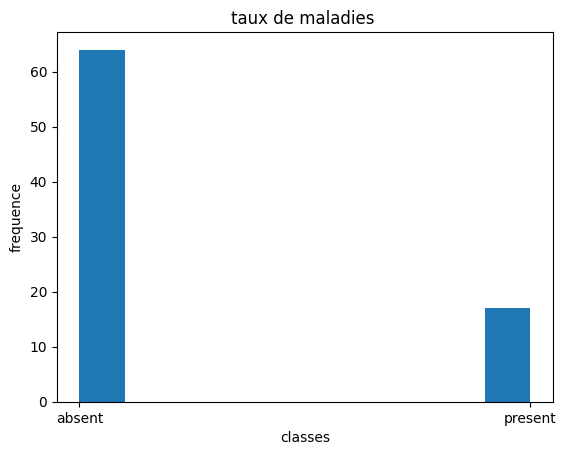

In [14]:
import matplotlib.pyplot as plt

fig, ax= plt.subplots()

ax.hist(df['Kyphosis'])

ax.set_title('taux de maladies ')
ax.set_xlabel('classes')
ax.set_ylabel('frequence')

Text(0, 0.5, 'frequence')

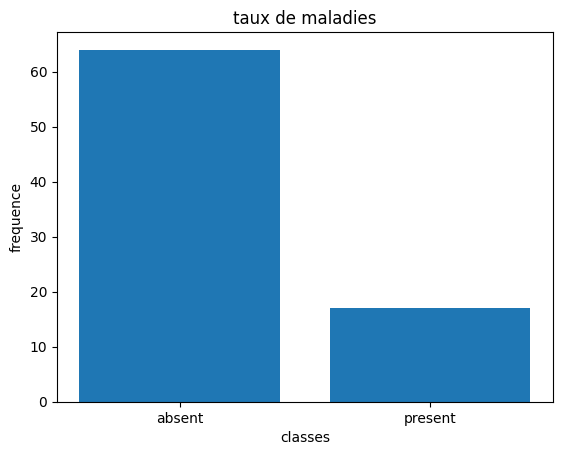

In [15]:
fig , ax = plt.subplots()

data= df['Kyphosis'].value_counts()

points = data.index
frequency  = data.values

ax.bar(points,frequency)
ax.set_title('taux de maladies')
ax.set_xlabel('classes')
ax.set_ylabel('frequence')

Ensemble d’apprentissage et de test
1 - spliting the data

In [20]:
from sklearn.model_selection import train_test_split

X=df.drop('Kyphosis', axis=1)

y = df['Kyphosis']

X_train, X_test , y_train , y_test = train_test_split(X,y,test_size=0.30)

****Construction d’un arbre de décision****

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
#Créez une instance du modèle
clf = DecisionTreeClassifier()

In [24]:
#Former le modèle sur les données
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [25]:
#Prédire les étiquettes des données (test) invisibles
clf.predict(X_test)

array(['present', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'present', 'absent', 'absent',
       'present', 'absent', 'absent', 'present', 'absent', 'absent',
       'absent', 'absent', 'present', 'absent', 'absent', 'present',
       'present'], dtype=object)

***Prédiction & Evaluation***

In [28]:
from sklearn.metrics import classification_report,confusion_matrix

# predir les etiquettes des doneessss
predictions = dtree.predict(X_test)

#affichage du matrice de confusion
print(confusion_matrix(y_test,predictions))

#afficher un resultats obtenus
print(classification_report(y_test,predictions))

[[18  3]
 [ 1  3]]
              precision    recall  f1-score   support

      absent       0.95      0.86      0.90        21
     present       0.50      0.75      0.60         4

    accuracy                           0.84        25
   macro avg       0.72      0.80      0.75        25
weighted avg       0.88      0.84      0.85        25



***Visualisation de l’arbre de décision
***


In [29]:
text_representation = tree.export_text(dtree)
print(text_representation)

|--- feature_2 <= 8.50
|   |--- feature_0 <= 130.50
|   |   |--- feature_0 <= 97.50
|   |   |   |--- feature_1 <= 4.50
|   |   |   |   |--- class: absent
|   |   |   |--- feature_1 >  4.50
|   |   |   |   |--- class: present
|   |   |--- feature_0 >  97.50
|   |   |   |--- class: present
|   |--- feature_0 >  130.50
|   |   |--- class: absent
|--- feature_2 >  8.50
|   |--- feature_2 <= 14.50
|   |   |--- feature_0 <= 55.00
|   |   |   |--- class: absent
|   |   |--- feature_0 >  55.00
|   |   |   |--- feature_0 <= 99.00
|   |   |   |   |--- class: present
|   |   |   |--- feature_0 >  99.00
|   |   |   |   |--- feature_1 <= 3.50
|   |   |   |   |   |--- feature_0 <= 129.50
|   |   |   |   |   |   |--- class: absent
|   |   |   |   |   |--- feature_0 >  129.50
|   |   |   |   |   |   |--- feature_2 <= 13.50
|   |   |   |   |   |   |   |--- class: present
|   |   |   |   |   |   |--- feature_2 >  13.50
|   |   |   |   |   |   |   |--- class: absent
|   |   |   |   |--- feature_1 >  3.50

[Text(0.5454545454545454, 0.9375, 'Start <= 8.5\ngini = 0.357\nsamples = 56\nvalue = [43, 13]\nclass = Absent'),
 Text(0.36363636363636365, 0.8125, 'Age <= 130.5\ngini = 0.49\nsamples = 14\nvalue = [6, 8]\nclass = present'),
 Text(0.2727272727272727, 0.6875, 'Age <= 97.5\ngini = 0.444\nsamples = 12\nvalue = [4, 8]\nclass = present'),
 Text(0.18181818181818182, 0.5625, 'Number <= 4.5\ngini = 0.49\nsamples = 7\nvalue = [4, 3]\nclass = Absent'),
 Text(0.09090909090909091, 0.4375, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = Absent'),
 Text(0.2727272727272727, 0.4375, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = present'),
 Text(0.36363636363636365, 0.5625, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]\nclass = present'),
 Text(0.45454545454545453, 0.6875, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = Absent'),
 Text(0.7272727272727273, 0.8125, 'Start <= 14.5\ngini = 0.21\nsamples = 42\nvalue = [37, 5]\nclass = Absent'),
 Text(0.6363636363636364, 0.6875, 'Age <= 55.0\ngini = 0.34\

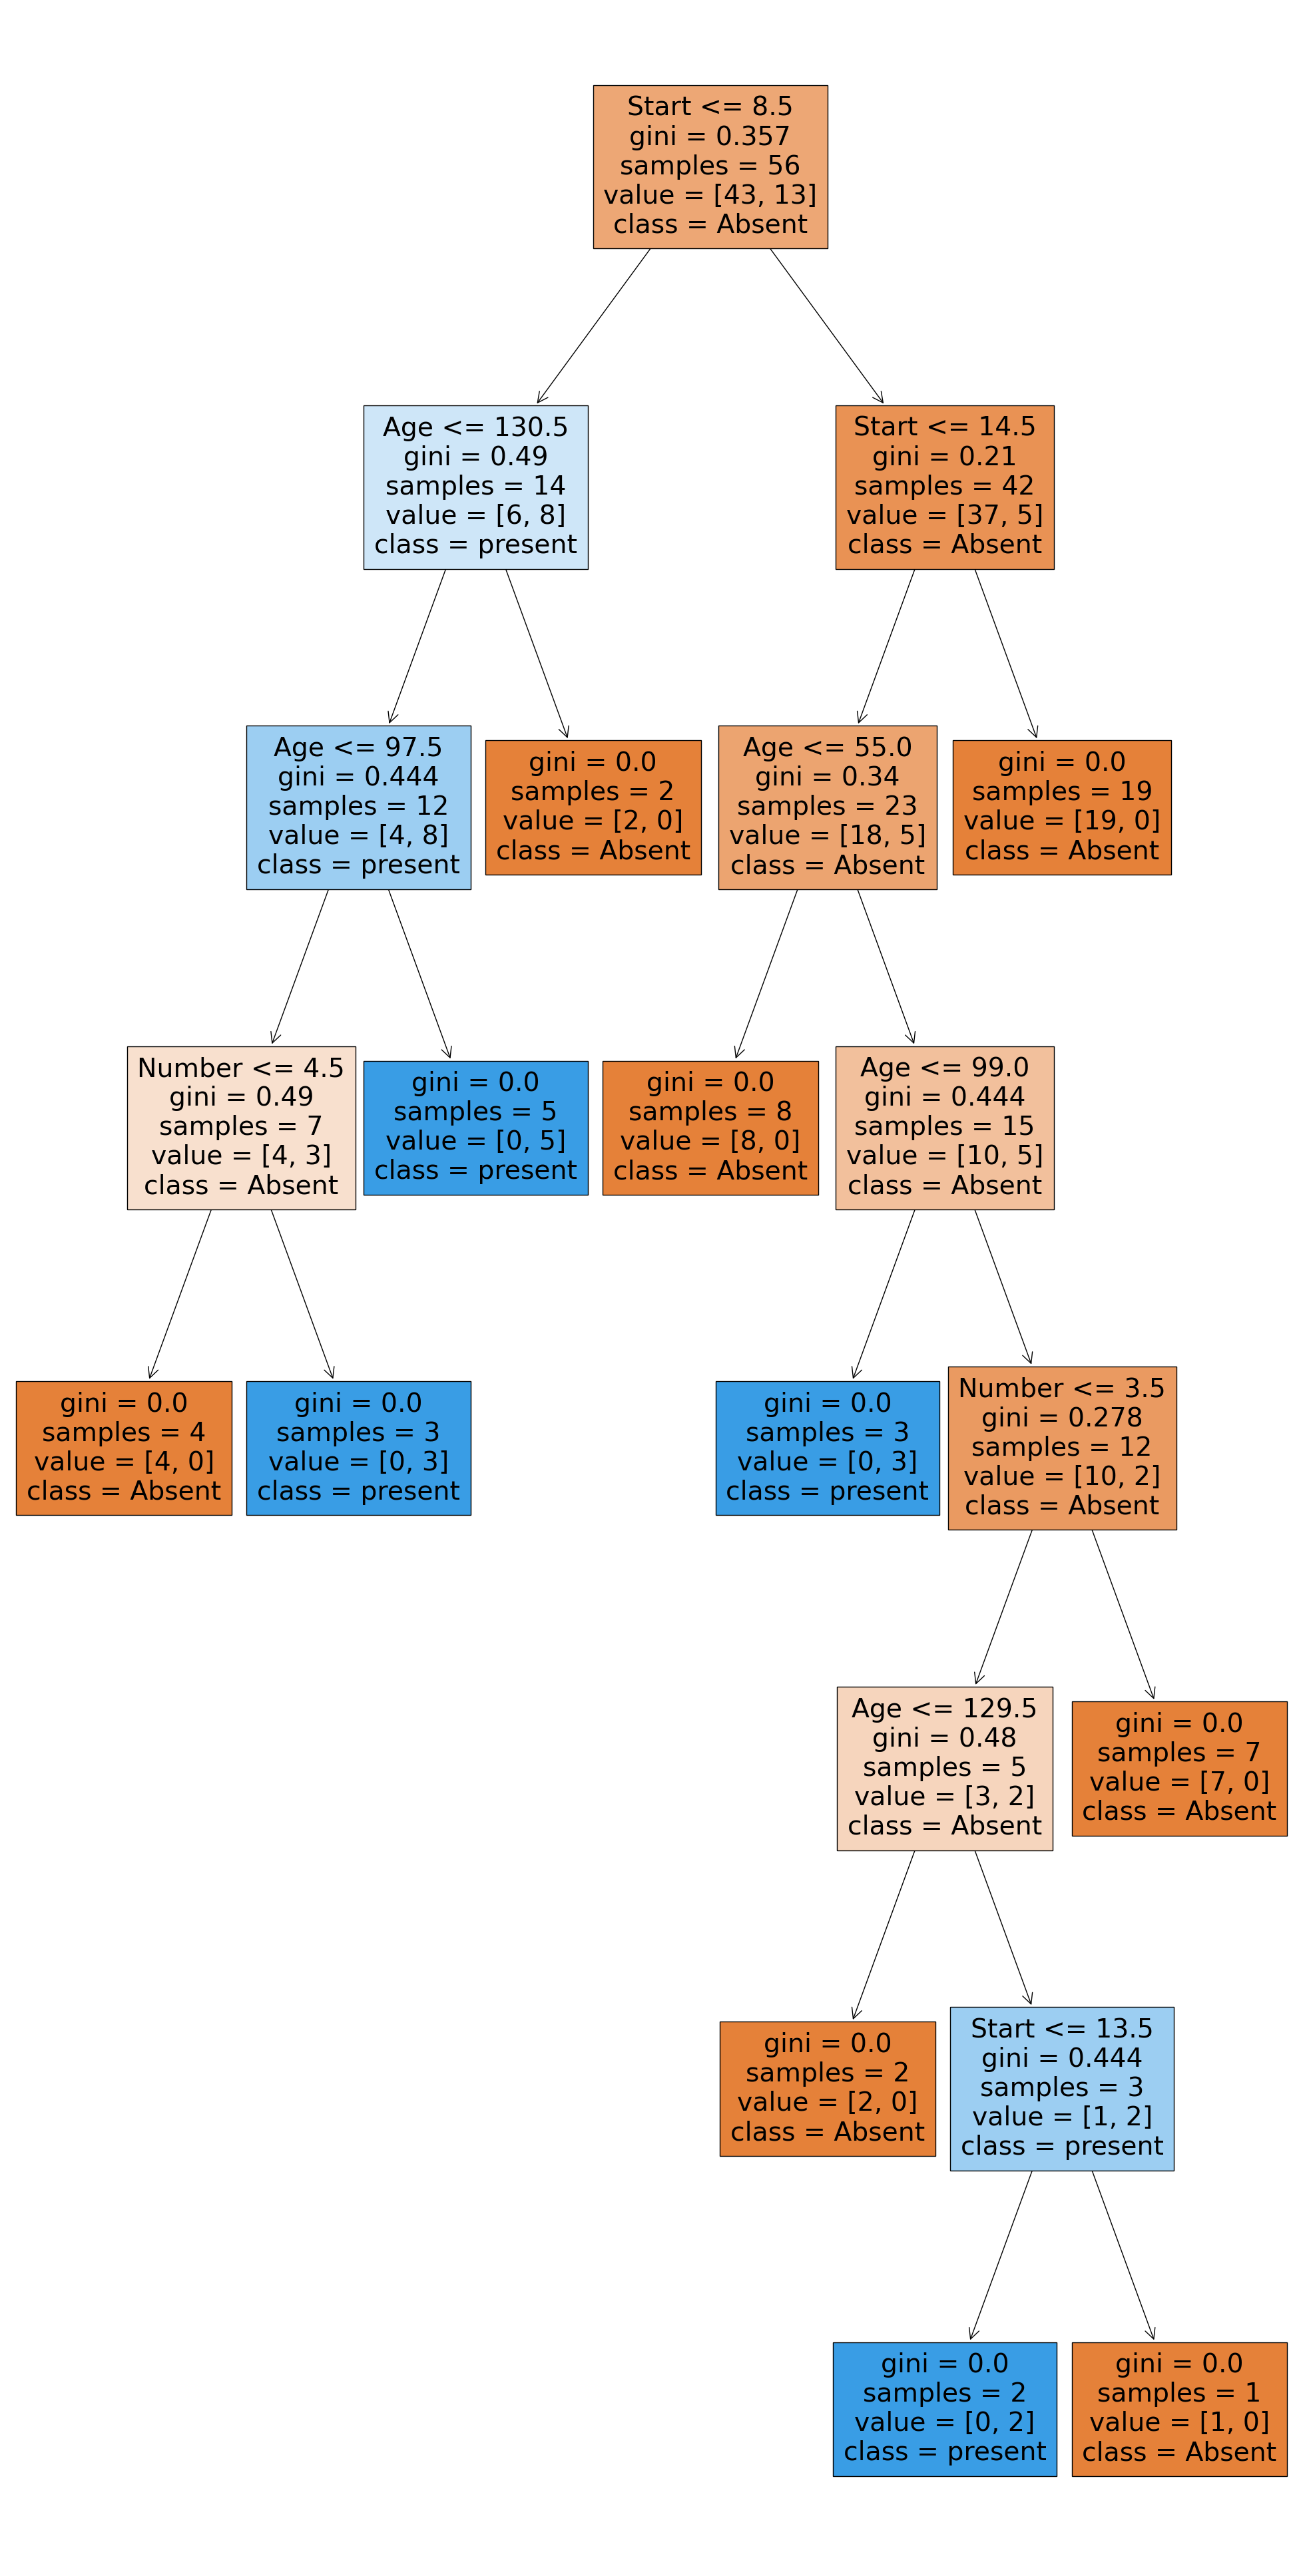

In [31]:
fn = ["Age","Number","Start"]

cn =["Absent", "present"]

fig = plt.figure(figsize=(25,50))

tree.plot_tree(dtree,feature_names=fn,class_names=cn, filled=True)